In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import time



In [2]:
# Reading the dataset
data = pd.read_csv("Boston (1).csv")



In [3]:
# Preprocessing the dataset
x = data.drop('MEDV', axis=1)
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [4]:
# Model definition
model = Sequential()
model.add(Dense(128,input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Training the model
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
train_time = time.time() - start_time
print("Training time:", train_time)



C:\Users\Manpreet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
11/11 [==============================] - 2s 57ms/step - loss: 565.8351 - mae: 22.0609 - val_loss: 505.2177 - val_mae: 20.5417
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 495.7388 - mae: 20.5044 - val_loss: 433.9076 - val_mae: 18.8445
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 410.9783 - mae: 18.3629 - val_loss: 335.6758 - val_mae: 16.3804
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 298.0938 - mae: 15.2658 - val_loss: 221.8341 - val_mae: 13.0288
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 181.9037 - mae: 11.3716 - val_loss: 120.3659 - val_mae: 9.2708
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 95.1597 - mae: 7.6998 - val_loss: 69.2209 - val_mae: 6.4594
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 59.5758 - mae: 5.9317 - val_loss: 53.2482 - val_mae: 5.3299
Epoch 8/50
11/11 [==============================] -

In [6]:
# Evaluating the model
start_time = time.time()
mse, mae = model.evaluate(x_test, y_test)
test_time = time.time() - start_time
print("Testing time:", test_time)
print("MSE:", mse)
print("MAE:", mae)



4/4 [==============================] - 0s 5ms/step - loss: 11.0315 - mae: 2.6286
Testing time: 0.20047211647033691
MSE: 11.031547546386719
MAE: 2.628586769104004


In [7]:
y_pred = model.predict(x_test[:])

4/4 [==============================] - 0s 4ms/step


In [8]:
p=[]
for i in y_pred:
 p.append(list(i)[0])
d = pd.DataFrame({'actual':y_test,'predicted':p})
d

,actual,predicted
307,28.2,28.143242
343,23.9,21.904482
47,16.6,19.517384
67,22.0,22.411589
362,20.8,24.644327
...,...,...
92,22.9,23.461302
224,44.8,43.697948
110,21.7,19.912043
426,10.2,17.653141


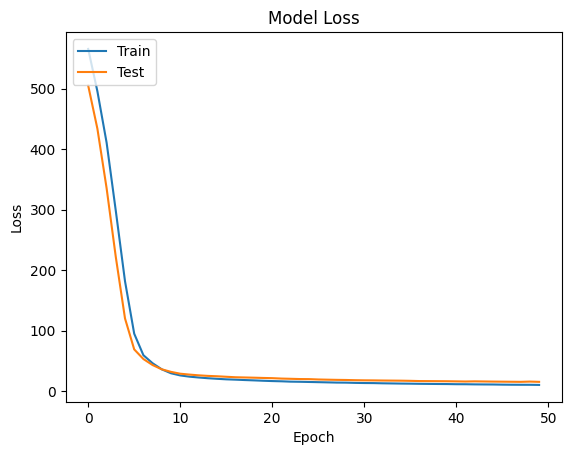

In [9]:
# Plotting the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Predicting using dynamic input from the user
while True:
    try:
        user_input = [float(x.strip()) for x in input("Enter the values of 13 features separated by commas: ").split(',')]
        if len(user_input) != 13:
            print("Please enter exactly 13 values.")
            continue
        user_input = np.array(user_input).reshape(1, 13)
        user_input_scaled = scaler.transform(user_input)  # Scale input features
        
        start_time = time.time()
        prediction = model.predict(user_input_scaled)
        pred_time = time.time() - start_time
        
        print("Predicted MEDV:", prediction[0][0])
        print("Prediction time:", pred_time)
    except ValueError:
        print("Please enter numerical values only.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break
# 0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14

Enter the values of 13 features separated by commas: 1.3547200000000001,0.0,8.14,0,0.538,6.072,100.0,4.175,4,307.0,21.0,376.73,13.04
1/1 [==============================] - 0s 96ms/step


C:\Users\Manpreet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted MEDV: 16.370308
Prediction time: 0.200028657913208
Enter the values of 13 features separated by commas: /n
Please enter numerical values only.
Enter the values of 13 features separated by commas: \n
Please enter numerical values only.
Enter the values of 13 features separated by commas: 
Please enter numerical values only.
